### Mushroom Classification Machine Learning Project

### Project Objectives

A mushroom is the fleshy, spore-bearing fruiting body of a fungus, typically produced above ground, on soil, or on its food source.

Some mushrooms are poisonous while others are poisonous. In this project, we seek to classify mushroom as edible or not edible for healthy consumption.

### Table of Content

1. Importation of Packages
  
2. Data Importation
 
3. Sanity Checks
 
4. Exploratory data analysis
 
5. Feature engineering

6. Train Test Split and Transformations
 
7. Model Building , Model evaluation:Classification Reports and Confusion Matrix

### 1. Importation of Packages

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

import seaborn as sns
import sklearn
import math

import warnings
warnings.filterwarnings('ignore')
import matplotlib.style as style
%matplotlib inline

from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline


### 2. Data Importation

In [6]:
mushroom_df = pd.read_csv('/mushrooms.csv')

### 3. Sanity Checks

In [7]:

mushroom_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


**First 5 rows**

In [ ]:
mushroom_df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


**Last 5 rows**

In [ ]:
mushroom_df['class'].unique()

array(['p', 'e'], dtype=object)

**The unique values for the class column are 0 and 1**

1.   List item
2.   List item



In [ ]:
mushroom_df['class'].nunique()

2

**There are two different unique values in the class column**

In [ ]:
mushroom_df.shape

(8124, 23)

**The dataset contains 23 columns and 8124 rows**

*   List item
*   List item



In [ ]:
mushroom_df.value_counts().sum()

8124

**There are 8124 values in the mushroom dataset**

In [ ]:
mushroom_df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


**Descriptive Statistics on the mushroom dataset**

In [ ]:
mushroom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

**No Column had null values**

In [ ]:
mushroom_df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

**There were zero null counts**

In [ ]:
mushroom_df.duplicated().sum()

0

**There were no duplicates**

In [ ]:
mushroom_df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

### 4. Exploratory Data Analysis

#### Univariate Analysis

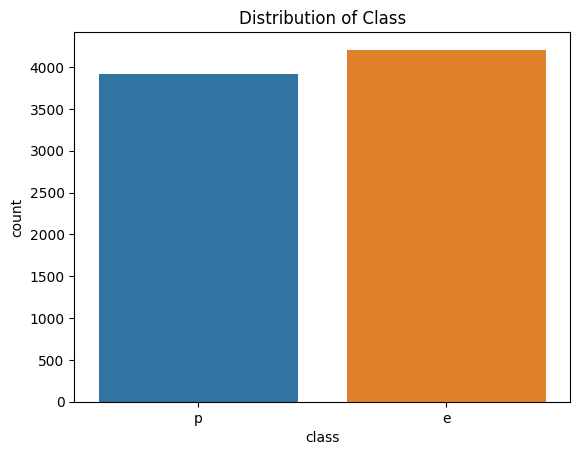

In [ ]:
sns.countplot(x='class', data = mushroom_df,hue = 'class')
plt.title('Distribution of Class')
plt.show()

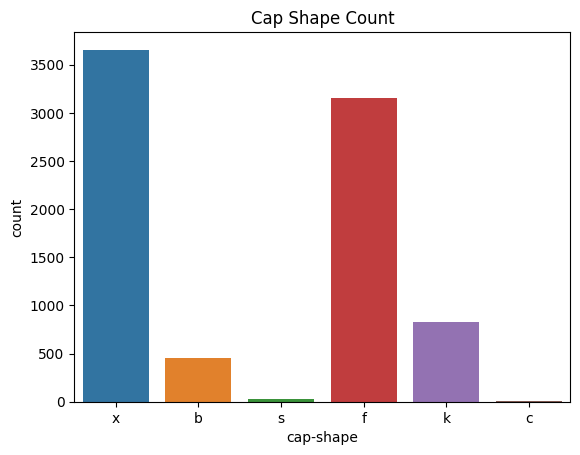

In [ ]:
sns.countplot(x='cap-shape', data = mushroom_df,hue = 'cap-shape')
plt.title('Cap Shape Count')
plt.show()

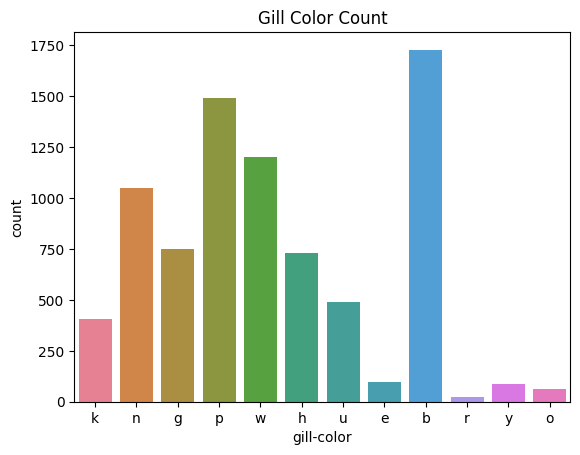

In [ ]:
sns.countplot(x='gill-color', data = mushroom_df,hue = 'gill-color')
plt.title('Gill Color Count')
plt.show()

#### Bivariate Analysis

In [ ]:
mushroom_df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

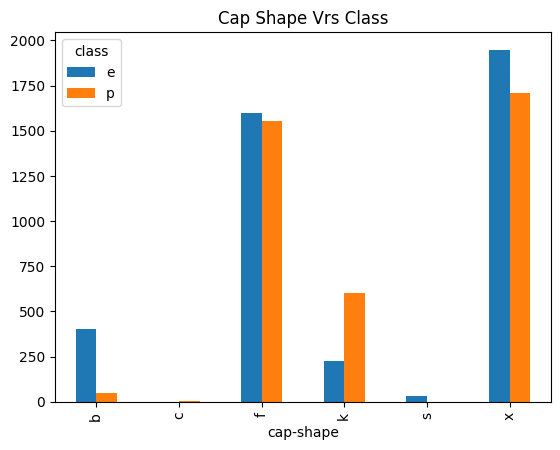

In [ ]:
cross_tab=pd.crosstab( mushroom_df['cap-shape'],mushroom_df['class'])
cross_tab.plot(kind= 'bar')
plt.title('Cap Shape Vrs Class')
plt.show()

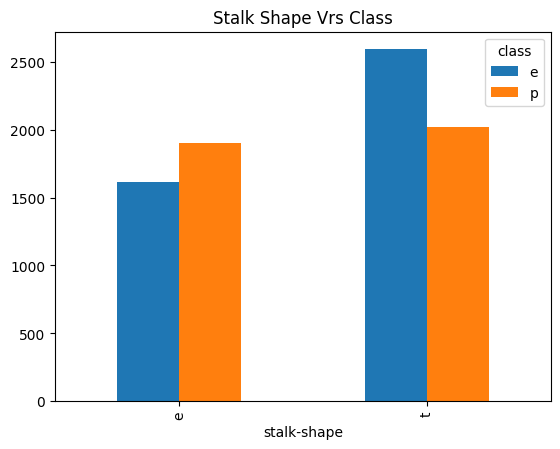

In [ ]:
cross_tab=pd.crosstab( mushroom_df['stalk-shape'],mushroom_df['class'])
cross_tab.plot(kind= 'bar')
plt.title('Stalk Shape Vrs Class')
plt.show()

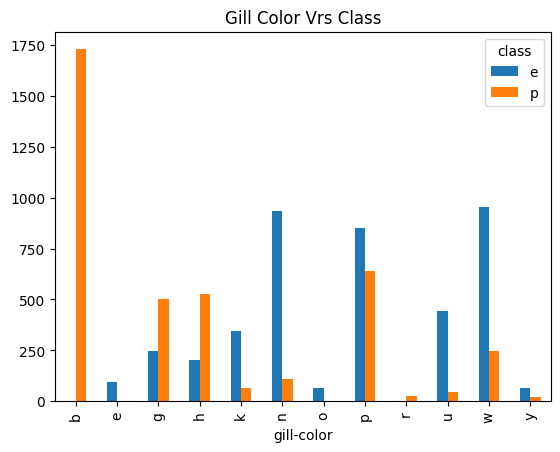

In [ ]:
cross_tab=pd.crosstab( mushroom_df['gill-color'],mushroom_df['class'])
cross_tab.plot(kind= 'bar')
plt.title('Gill Color Vrs Class')
plt.show()

#### Multivariate Analysis

In [ ]:
mushroom_df.pivot_table(index='gill-color',columns ='class', values='cap-shape', aggfunc='count')

class,e,p
gill-color,,
b,NaN,1728.0
e,96.0,NaN
g,248.0,504.0
h,204.0,528.0
k,344.0,64.0
n,936.0,112.0
o,64.0,NaN
p,852.0,640.0
r,NaN,24.0


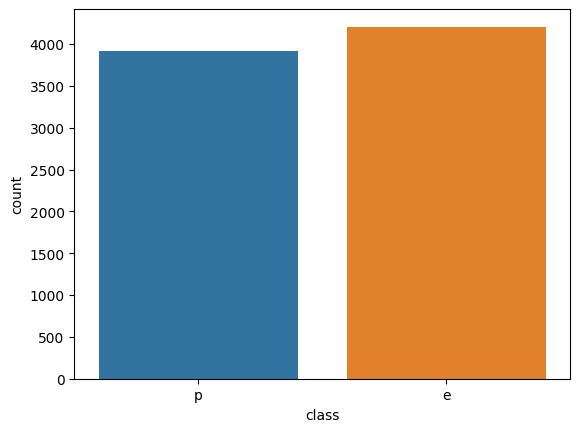

In [ ]:
sns.countplot(x='class', data = mushroom_df,hue = 'class')
plt.show()

### 5. Feature Engineering

**One Hot Encoding**

In [12]:
mushroom_df = pd.get_dummies(mushroom_df,drop_first = True)

In [13]:
mushroom_df.head()

,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,True,False,False,False,False,True,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,True,False,False,...,True,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,True,False,False,False
3,True,False,False,False,False,True,False,False,True,False,...,False,True,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
#Changing Data type
mushroom_df = mushroom_df.astype(int)

In [ ]:
mushroom_df.head()

,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


### 6. Train Test Split and Transformations

**Train Test Split**

In [14]:
X= mushroom_df.drop(columns='class_p')
y= mushroom_df['class_p']
print(X.shape)
print(y.shape)

(8124, 95)
(8124,)


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.25, random_state=42,stratify= y)
print(X_train, '\n',X_test,'\n', y_train,'\
n', y_test)

      cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  cap-shape_x  \
6345        False        False        False        False         True   
5239        False        False         True        False        False   
6231        False         True        False        False        False   
226         False        False        False        False         True   
4305        False         True        False        False        False   
...           ...          ...          ...          ...          ...   
6175        False        False         True        False        False   
5386        False        False        False        False         True   
1357        False         True        False        False        False   
2977        False        False        False        False         True   
4879        False         True        False        False        False   

      cap-surface_g  cap-surface_s  cap-surface_y  cap-color_c  cap-color_e  \
6345          False           True          

In [ ]:
mushroom_df.columns

Index(['class_p', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s',
       'cap-shape_x', 'cap-surface_g', 'cap-surface_s', 'cap-surface_y',
       'cap-color_c', 'cap-color_e', 'cap-color_g', 'cap-color_n',
       'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w',
       'cap-color_y', 'bruises_t', 'odor_c', 'odor_f', 'odor_l', 'odor_m',
       'odor_n', 'odor_p', 'odor_s', 'odor_y', 'gill-attachment_f',
       'gill-spacing_w', 'gill-size_n', 'gill-color_e', 'gill-color_g',
       'gill-color_h', 'gill-color_k', 'gill-color_n', 'gill-color_o',
       'gill-color_p', 'gill-color_r', 'gill-color_u', 'gill-color_w',
       'gill-color_y', 'stalk-shape_t', 'stalk-root_b', 'stalk-root_c',
       'stalk-root_e', 'stalk-root_r', 'stalk-surface-above-ring_k',
       'stalk-surface-above-ring_s', 'stalk-surface-above-ring_y',
       'stalk-surface-below-ring_k', 'stalk-surface-below-ring_s',
       'stalk-surface-below-ring_y', 'stalk-color-above-ring_c',
       'stalk-colo

**Scaling and Transformation**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
pca = PCA(n_components = 2)
pca.fit(scaled_X_train)
pca_components = pca.fit_transform(X_train)

### 7. Model Building , Model evaluation : Classification Reports and Confusion Matrix

**Dummy Classifier**

In [16]:
dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy score: {:.2f}".format(dummy.score(X_test, y_test)))

dummy score: 0.52


#Linear Models

**Knn Pipeline**

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.999015263417036


**KNN Normal**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train,y_train)

print("The training score is: {} " .format(knn.score(X_train,y_train)))
print("The test score is: {} " .format(knn.score(X_test,y_test)))

The training score is: 0.9991793861808633 
The test score is: 0.9985228951255539 


**KNN Grid Search CV**

In [ ]:
knn_clf = KNeighborsClassifier()
param_grid_ = {'n_neighbors': [3, 5, 7, 9],
              'weights': ['uniform', 'distance'],
              'p': [1, 2] }
grid_search = GridSearchCV(knn_clf, param_grid_, cv=5)
grid_search.fit(X_train, y_train)
print("Train set score: {:.2f}".format(grid_search.score(X_train, y_train)))
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Train set score: 1.00
Test set score: 1.00
Best parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Best cross-validation score: 1.00
Best estimator:
KNeighborsClassifier(n_neighbors=3, p=1)


**KNeighbors**\
**Predicting The Test Score Using The Best Parameter**

In [ ]:
knn_clf_ = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
pred_knn = knn_clf_.predict(X_test)
print("Test score: {:.2f}".format(knn_clf_.score(X_test, y_test)))

Test score: 1.00


**SVC Pipeline**

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.999015263417036


**SVC Normal**

In [ ]:
from sklearn.svm import SVC

svm = SVC()

svm.fit(X_train,y_train)
print("The training score is: {} " .format(svm.score(X_train,y_train)))
print("The test score is: {} " .format(svm.score(X_test,y_test)))

The training score is: 1.0 
The test score is: 1.0 


**SVC Grid Search CV**

In [ ]:
param_grid = [{'kernel': ['rbf'],
'C': [0.001, 0.01, 0.1, 1, 10, 100],
'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},

{'kernel': ['linear'],
'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grids:\n{}".format(param_grid))


List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [1]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Train set score: {:.2f}".format(grid_search.score(X_train, y_train)))
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

**SVC**\
**Predicting The Test Score Using The Best Parameter**

In [ ]:
svm_ = SVC(gamma=0.1).fit(X_train, y_train)
pred_svm = svm_.predict(X_test)
print("Test score: {:.2f}".format(svm_.score(X_test, y_test)))

Test score: 1.00


**Logistic Regression Pipeline**

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


**Logistic Regression Normal**

In [ ]:
logreg= LogisticRegression()

logreg.fit(X_train,y_train)
print("The training score is: {} " .format(logreg.score(X_train,y_train)))
print("The test score is: {} " .format(logreg.score(X_test,y_test)))

The training score is: 0.9998358772361726 
The test score is: 0.999015263417036 


**Logistic Regression Grid Search**

In [ ]:
param_grids= [{'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grids:\n{}".format(param_grids))

List of grids:
[{'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [ ]:
grid_search = GridSearchCV(logreg, param_grids, cv=5)
grid_search.fit(X_train, y_train)
print("Train set score: {:.2f}".format(grid_search.score(X_train, y_train)))
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Train set score: 1.00
Test set score: 1.00
Best parameters: {'C': 100}
Best cross-validation score: 1.00
Best estimator:
LogisticRegression(C=100)


**Logistic Rregression**\
**Predicting The Test Score Using The Best Parameter**

In [ ]:
logreg_ = LogisticRegression(C=100).fit(X_train, y_train)
pred_logreg = logreg_.predict(X_test)
print("logreg score: {:.2f}".format(logreg.score(X_test, y_test)))

logreg score: 1.00


#Non Linear Method

**Decision Tree Pipeline**

In [30]:
pipeline = Pipeline([
    ('dt', DecisionTreeClassifier(random_state=42))
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


**Decision Tree Normal**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier()

tree.fit(X_train,y_train)
print("The training score is: {} " .format(tree.score(X_train,y_train)))
print("The test score is: {} " .format(tree.score(X_test,y_test)))

The training score is: 1.0 
The test score is: 1.0 


**Decision Tree Grid Search CV**

In [ ]:
param__grid = {'max_depth': [3, 5, 7, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}
grid_search = GridSearchCV(tree, param__grid, cv=5)
grid_search.fit(X_train, y_train)
print("Train set score: {:.2f}".format(grid_search.score(X_train, y_train)))
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Train set score: 1.00
Test set score: 1.00
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: 1.00
Best estimator:
DecisionTreeClassifier()


**Decision Tree**\
**Predicting The Test Score Using The Best Parameter**

In [ ]:
tree_ = DecisionTreeClassifier(max_depth=7).fit(X_train, y_train)
pred_tree = tree_.predict(X_test)
print("Test score: {:.2f}".format(tree_.score(X_test, y_test)))

Test score: 1.00


**Classification Report For Decision Tree**

print(classification_report(y_test, pred_tree,target_names=["edible", "poisonous"]))

**Confusion Matrix For Models**

In [ ]:
print("Dummy model:")
print(confusion_matrix(y_test, pred_dummy))
print("\nDecision tree:")
print(confusion_matrix(y_test, pred_tree))
print("\nLogistic Regression")
print(confusion_matrix(y_test, pred_logreg))
print("\nKNeighbors:")
print(confusion_matrix(y_test, pred_knn))
print("\nSVC:")
print(confusion_matrix(y_test, pred_svm))

Dummy model:
[[1052    0]
 [ 979    0]]

Decision tree:
[[1052    0]
 [   0  979]]

Logistic Regression
[[1052    0]
 [   0  979]]

KNeighbors:
[[1052    0]
 [   0  979]]

SVC:
[[1052    0]
 [   0  979]]


**Classification Reports for Linear Models**\
**KNeighbors**

In [ ]:
print(classification_report(y_test, pred_knn,target_names=["edible", "poisonous"]))

              precision    recall  f1-score   support

      edible       1.00      1.00      1.00      1052
   poisonous       1.00      1.00      1.00       979

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



**SVC**

In [ ]:
print(classification_report(y_test, pred_svm,target_names=["edible", "poisonous"]))

              precision    recall  f1-score   support

      edible       1.00      1.00      1.00      1052
   poisonous       1.00      1.00      1.00       979

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



**Logistic Regression**

In [ ]:
print(classification_report(y_test, pred_logreg,target_names=["edible", "poisonous"]))

              precision    recall  f1-score   support

      edible       1.00      1.00      1.00      1052
   poisonous       1.00      1.00      1.00       979

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



#Ensemble Methods

**Random Forest Pipeline**

In [29]:
pipeline = Pipeline([
    ('rf', RandomForestClassifier(random_state=42))
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


**Random Forest Normal**

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))

1.0
1.0


**Grid Search cv for Random Forest**

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(class_weight='balanced')
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4]
}
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
rfc = RandomForestClassifier(class_weight='balanced')

# Define the parameters to search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4]
}
grid_cv = GridSearchCV(rfc, param_grid, cv=5)
grid_cv.fit(X_train, y_train)
best_params = grid_cv.best_params_
best_model = grid_cv.best_estimator_
print(best_params)

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


**Random Forest best model prediction**

In [31]:
model = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
model.fit(X_train, y_train)
predicted_test_score = model.score(X_test, y_test)
print(predicted_test_score)

1.0


**Gradient Boost Pipeline**

In [34]:
pipeline = Pipeline([
    ('gbc', GradientBoostingClassifier(random_state=42))
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.999015263417036


**Gradient Boost Normal**

In [23]:

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1, subsample=0.5, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


**Grid Search cv for Gradient Boost**

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [100, 200, 500],
    'max_depth': [4, 8, 16]
}
gb = GradientBoostingClassifier()
grid_cv = GridSearchCV(gb, param_grid, cv=5)
grid_cv.fit(X_train, y_train)
best_model = grid_cv.best_estimator_
best_params = grid_cv.best_params_
print(best_params)

{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500}


**Gradient Boost best model prediction**

In [33]:

model = GradientBoostingClassifier(learning_rate=0.01, max_depth=4, n_estimators=500)
model.fit(X_train, y_train)
predicted_test_score = model.score(X_test, y_test)
print(predicted_test_score)

0.999015263417036


**XG Boost Pipeline**

In [55]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
pipeline = Pipeline([
    ('xgb', XGBClassifier())
])
param_grid = {
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__max_depth': [4, 8, 16],
    'xgb__n_estimators': [50, 100, 200]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print(grid_search.best_params_)
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


{'xgb__learning_rate': 0.1, 'xgb__max_depth': 4, 'xgb__n_estimators': 100}
Accuracy: 1.0


**XG Boost Normal**

In [52]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

y_pred = xgb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


**Grid Search for XG Boost**

In [53]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
model = XGBClassifier()
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [4, 8, 16],
    'n_estimators': [50, 100, 200]
}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print(grid_search.best_params_)
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
Accuracy: 1.0


**XG Boost best model prediction**

In [56]:
from xgboost import XGBClassifier
model = XGBClassifier(learning_rate=0.1, max_depth=4, n_estimators=100)
model.fit(X_train, y_train)
predicted_test_score = model.score(X_test, y_test)
print(predicted_test_score)

1.0


**Grid Search cv for Adaboost**

In [2]:
# base_estimator = DecisionTreeClassifier()

# adaboost = AdaBoostClassifier(estimator=base_estimator)
# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'learning_rate': np.arange(0.1, 1.1, 0.1),
#     'base_estimator__max_depth': [None, 3, 5, 7],
#     'base_estimator__criterion': ['gini', 'entropy'],
#     'base_estimator__splitter': ['best', 'random'],
#     'base_estimator__max_features': ['auto', 'sqrt', 'log2'],
#     'algorithm': ['SAMME', 'SAMME.R']
# }

# grid_search = GridSearchCV(adaboost, param_grid, cv=5, n_jobs=-1)
# grid_search.fit(X_train, y_train)
# best_adaboost = grid_search.best_estimator_

# print("Best Hyperparameters:", grid_search.best_params_)
# print("Best Accuracy:", grid_search.best_score_)